In [ ]:
!git clone https://github.com/ultralytics/yolov5  # clone YOLOv5 repository
%cd yolov5
!pip install -r requirements.txt  # install dependencies

In [ ]:
pip install torch --upgrade

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 906.4/906.4 MB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 89.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 65.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 48.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 11.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 8.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 188.7/188.7 MB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 74.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
import torch
import cv2
from matplotlib import pyplot as plt
import numpy as np

# Load the YOLOv5 model
model = torch.hub.load('ultralytics/yolov5', 'custom', path='/content/drive/MyDrive/Project1/Coefficient/best.pt')

def detect_objects(image):
    """
    Detect objects in an image and return the bounding box coordinates and original image.

    Args:
    - image: numpy array of the image (e.g., loaded using OpenCV).

    Returns:
    - original_image: The input image (unchanged).
    - bboxes: List of bounding box coordinates in the format [x_min, y_min, x_max, y_max, confidence, class_id].
    """
    # Convert image to RGB format (required by YOLOv5 model)
    rgb_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Run the YOLO model inference
    results = model(rgb_image)

    # Extract bounding boxes and convert to a list
    bboxes = []
    for *box, conf, class_id in results.xyxy[0]:  # xyxy format: (x_min, y_min, x_max, y_max, confidence, class)
        bboxes.append([int(box[0]), int(box[1]), int(box[2]), int(box[3]), float(conf), int(class_id)])

    # Return the original image and the list of bounding box coordinates
    return image, bboxes

# Example usage:
image_path = "/content/drive/MyDrive/Project1/YOLO/images/train/image_1083.jpg"
input_image = cv2.imread(image_path)  # Load the image as a numpy array
original_image, bounding_boxes = detect_objects(input_image)

# Display results
print("Bounding Boxes:", bounding_boxes)
plt.imshow(cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()


Its a basic convolutional model, experiment to increase accuracy

In [ ]:
import os
import cv2
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Dropout

# Paths
data_dir = '/content/drive/MyDrive/Project1/Severity Data'
categories = ['Intense', 'Medium', 'Minimum']

# Function to load images and bounding boxes
def load_data(data_dir, categories):
    images = []
    labels = []

    for category in categories:
        images_path = os.path.join(data_dir, category, 'images')
        texts_path = os.path.join(data_dir, category, 'texts')

        for image_file in os.listdir(images_path):
            if image_file.endswith('.jpg'):
                # Load image
                image_path = os.path.join(images_path, image_file)
                image = cv2.imread(image_path)

                # Load corresponding YOLO bounding box file
                bbox_file_path = os.path.join(texts_path, image_file.replace('.jpg', '.txt'))
                if os.path.exists(bbox_file_path):
                    with open(bbox_file_path, 'r') as bbox_file:
                        for line in bbox_file.readlines():
                            # Extract bounding box information
                            parts = line.split()
                            x_center, y_center, width, height = map(float, parts[1:5])

                            # Convert YOLO format to pixel coordinates
                            img_height, img_width = image.shape[:2]
                            x1 = int((x_center - width / 2) * img_width)
                            y1 = int((y_center - height / 2) * img_height)
                            x2 = int((x_center + width / 2) * img_width)
                            y2 = int((y_center + height / 2) * img_height)

                            # Crop the image using the bounding box
                            cropped_image = image[y1:y2, x1:x2]

                            # Append cropped image and corresponding label
                            images.append(cropped_image)
                            labels.append(category)

    # Print debug information
    print(f"Total images loaded: {len(images)}")
    print(f"Total labels loaded: {len(labels)}")

    return images, labels





In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.regularizers import l2


# Load data
images, labels = load_data(data_dir, categories)

# Preprocess images and labels
if images:  # Check if images list is not empty
    images = np.array([cv2.resize(img, (64, 64)) for img in images])  # Resize images to 64x64
    labels = pd.get_dummies(labels).values  # One-hot encode labels

    # Split data into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)


    # Build the model with additional layers and regularization
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)),
        BatchNormalization(),
        MaxPooling2D(pool_size=(2, 2)),
        Dropout(0.25),

        Conv2D(64, (3, 3), activation='relu'),
        BatchNormalization(),
        MaxPooling2D(pool_size=(2, 2)),
        Dropout(0.25),

        Conv2D(128, (3, 3), activation='relu'),
        BatchNormalization(),
        MaxPooling2D(pool_size=(2, 2)),
        Dropout(0.5),


        Flatten(),
        Dense(256, activation='relu', kernel_regularizer=l2(0.001)),
        Dropout(0.5),
        Dense(len(categories), activation='softmax')
    ])

    # Compile the model
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

    # Set up early stopping and model checkpoint
    early_stopping = EarlyStopping(monitor='val_accuracy', patience=10, restore_best_weights=True)
    model_checkpoint = ModelCheckpoint('best_severity_classification_model.keras',
                                         monitor='val_accuracy',
                                         save_best_only=True)
    # Create a function to augment and combine the original data
    def augment_data(images, labels, num_augmented=1000):
        augmented_images = []
        augmented_labels = []

        for i in range(num_augmented):
            idx = np.random.randint(0, len(images))  # Select a random image index
            img = images[idx]
            label = labels[idx]

            # Perform augmentation (in this case, only horizontal flip)
            if np.random.rand() < 0.5:  # 50% chance to flip
                img = np.fliplr(img)  # Flip the image horizontally

            augmented_images.append(img)
            augmented_labels.append(label)

        return np.array(augmented_images), np.array(augmented_labels)

    # Generate augmented data
    augmented_images, augmented_labels = augment_data(X_train, y_train, num_augmented=1000)

    # Combine original and augmented data
    X_combined = np.concatenate((X_train, augmented_images), axis=0)
    y_combined = np.concatenate((y_train, augmented_labels), axis=0)

    # Train the model using augmented data
    model.fit(X_combined, y_combined,
          epochs=80,
          validation_data=(X_test, y_test),
          callbacks=[early_stopping, model_checkpoint])

else:
    print("No images were loaded. Please check your data directory and files.")


In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.regularizers import l2


# Load data
images, labels = load_data(data_dir, categories)

# Preprocess images and labels
if images:  # Check if images list is not empty
    images = np.array([cv2.resize(img, (64, 64)) for img in images])  # Resize images to 64x64
    labels = pd.get_dummies(labels).values  # One-hot encode labels

    # Split data into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)

Total images loaded: 925
Total labels loaded: 925


In [ ]:
import numpy as np

# Save the train and test data
np.save('/content/drive/MyDrive/Project1/Data/X_train.npy', X_train)
np.save('/content/drive/MyDrive/Project1/Data/X_test.npy', X_test)
np.save('/content/drive/MyDrive/Project1/Data/y_train.npy', y_train)
np.save('/content/drive/MyDrive/Project1/Data/y_test.npy', y_test)

In [ ]:
import numpy as np
# Load the train and test data
X_train = np.load('/content/drive/MyDrive/Project1/Data/X_train.npy')
X_test = np.load('/content/drive/MyDrive/Project1/Data/X_test.npy')
y_train = np.load('/content/drive/MyDrive/Project1/Data/y_train.npy')
y_test = np.load('/content/drive/MyDrive/Project1/Data/y_test.npy')


In [ ]:
from collections import Counter

# Print number of images in each class for training data
train_class_counts = Counter(np.argmax(y_train, axis=1))
print("Number of images in each class for training data:")
for label, count in train_class_counts.items():
    print(f"{categories[label]}: {count}")

Number of images in each class for training data:
Intense: 394
Medium: 210
Minimum: 136


In [ ]:
%matplotlib inline

In [ ]:
print(X_test[test_index])

[[[254 249 250]
  [254 249 250]
  [252 247 248]
  ...
  [174 172 172]
  [160 155 157]
  [123 118 120]]

 [[254 248 249]
  [255 250 249]
  [253 248 247]
  ...
  [176 173 175]
  [148 143 144]
  [121 116 118]]

 [[254 248 249]
  [254 249 248]
  [253 248 247]
  ...
  [176 173 175]
  [160 155 156]
  [137 132 134]]

 ...

 [[122 131 135]
  [124 128 133]
  [120 124 129]
  ...
  [145 141 146]
  [145 141 146]
  [145 141 146]]

 [[118 127 131]
  [120 124 129]
  [128 132 137]
  ...
  [145 141 146]
  [145 141 146]
  [145 141 146]]

 [[111 120 124]
  [114 118 123]
  [119 123 128]
  ...
  [143 139 144]
  [143 139 144]
  [143 139 144]]]


In [ ]:
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
import numpy as np

# Load the model
model = load_model('/content/drive/MyDrive/Project1/Coefficient/best_severity_classification_model.keras')

def predict(input):
  test_index = 132
  single_image = X_test[test_index]

  # Ensure the image has the batch dimension by expanding it to shape (1, 64, 64, 3)
  single_image = np.expand_dims(single_image, axis=0)

  # Predict class probabilities for the single image
  predictions = model.predict(single_image)
  pred_probabilities = predictions[0]  # Extract probabilities from the batch
  class_index = np.argmax(pred_probabilities)  # Get the index of the highest probability
  class_label = categories[class_index]

  # Display the image with prediction details
  plt.imshow(X_test[test_index])
  plt.title(f"Index: {test_index}\nPred: {class_label}\nProbs: {pred_probabilities.round(3)}")
  plt.axis('off')
  plt.show()


In [ ]:
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
import numpy as np

# Load the model
model = load_model('/content/drive/MyDrive/Project1/Coefficient/best_severity_classification_model.keras')

# Select a single image from the test set
def predict(input):
  test_index = 132
  single_image =input

  single_image = np.expand_dims(single_image, axis=0)
  # Predict class probabilities for the single image
  predictions = model.predict(single_image)
  pred_probabilities = predictions[0]  # Extract probabilities from the batch
  class_index = np.argmax(pred_probabilities)  # Get the index of the highest probability
  class_label = categories[class_index]

  # Display the image with prediction details
  plt.imshow(input)
  plt.title(f"Index: {test_index}\nPred: {class_label}\nProbs: {pred_probabilities.round(3)}")
  plt.axis('off')
  plt.show()


Total images loaded: 925
Total labels loaded: 925


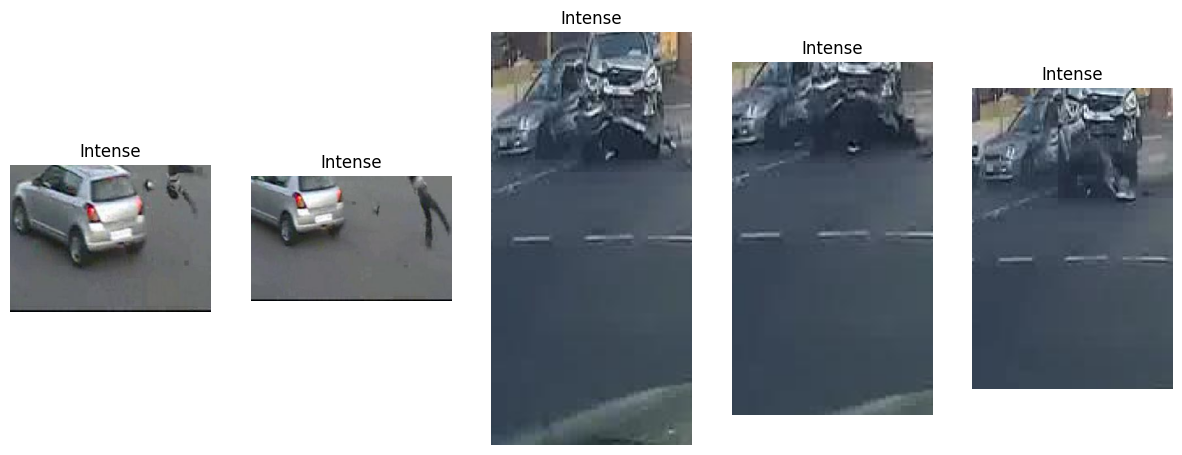

In [ ]:
import matplotlib.pyplot as plt

# Load data
images, labels = load_data(data_dir, categories)

# Print top 5 cropped images
def plot_cropped_images(images, labels, num_images=5):
    plt.figure(figsize=(15, 10))
    for i in range(num_images):
        plt.subplot(1, num_images, i + 1)
        plt.imshow(cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB))
        plt.title(labels[i])
        plt.axis('off')
    plt.show()

# Show top 5 cropped images
plot_cropped_images(images, labels)

In [ ]:
# Evaluate the model on the test set
from tensorflow.keras.models import load_model

model = load_model('/content/drive/MyDrive/Project1/Coefficient/best_severity_classification_model.keras')
loss, accuracy = model.evaluate(X_train, y_train, verbose=0)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

Test Accuracy: 93.92%


To Use the Saved Severity Model and predict the class of an image with its bounding box.

In [ ]:
y_test[0]

array([ True, False, False])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 256ms/step


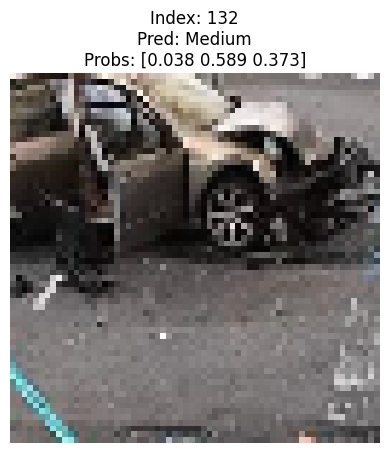

In [ ]:
import numpy as np
import cv2
from tensorflow.keras.models import load_model

# Load the trained model
model = load_model('/content/drive/MyDrive/Project1/Coefficient/best_severity_classification_model.keras')

def yolo_to_pixel_coords(yolo_bbox, img_width, img_height):
    """Convert YOLO bounding box format to pixel coordinates for cropping."""
    x_center, y_center, width, height = yolo_bbox
    x_center, y_center = int(x_center * img_width), int(y_center * img_height)
    box_width, box_height = int(width * img_width), int(height * img_height)

    # Calculate the bounding box corners
    x_min = max(x_center - box_width // 2, 0)
    y_min = max(y_center - box_height // 2, 0)
    x_max = min(x_center + box_width // 2, img_width - 1)
    y_max = min(y_center + box_height // 2, img_height - 1)

    return x_min, y_min, x_max, y_max

def crop_and_predict(image_path, yolo_bbox, model):
    # Load image
    img = cv2.imread(image_path)
    img_height, img_width = img.shape[:2]

    # Convert YOLO bbox to pixel coordinates and crop
    x_min, y_min, x_max, y_max = yolo_to_pixel_coords(yolo_bbox, img_width, img_height)
    cropped_img = img[y_min:y_max, x_min:x_max]

    # Preprocess cropped image for prediction
    cropped_img = cv2.resize(cropped_img, (64, 64))


    return cropped_img

# Example usage
image_path = '/content/drive/MyDrive/Project1/Severity Data/Intense/images/image_1049.jpg'  # Replace with your image path
yolo_bbox = (0.31484375,0.8045186640471512,0.4234375,0.6031434184675835)  # Replace with your bounding box in YOLO format (x_center, y_center, width, height)
input_image = crop_and_predict(image_path, yolo_bbox, model)
predict(input_image)

In [ ]:
print(cropped_img.shape)

(1, 64, 64, 3)


In [ ]:
cropped_img = cv2.resize(X_test[132], (64, 64))
cropped_img = cropped_img / 255.0  # Normalize pixel values
cropped_img = np.expand_dims(cropped_img, axis=0)  # Add batch dimension

    # Predict class probabilities
predictions = model.predict(cropped_img)
print(predictions)
class_index = np.argmax(predictions[0]) # Get index of the highest probability
print(class_index)
class_label = categories[class_index]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
[[0.20127557 0.7977711  0.00095327]]
1


EXTRA CODES

In [ ]:
import matplotlib.pyplot as plt

# Assuming 'history' is the result of model.fit() while training the model
history = model.history  # Replace this with the actual history variable from training

# Plotting the accuracy graph
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()


AttributeError: 'Sequential' object has no attribute 'history'

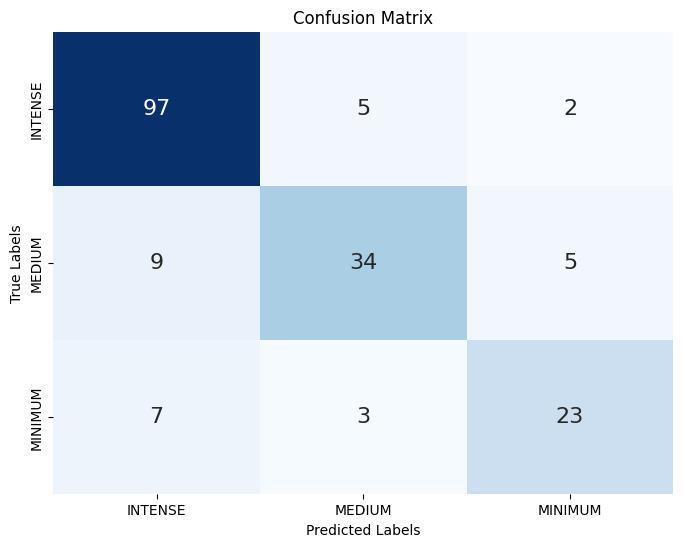

In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming y_pred_classes is in one-hot encoded format, like [1, 0, 0], [0, 1, 0], etc.
# Convert the one-hot encoded predictions to class indices
y_pred_classes = np.argmax(y_pred, axis=1)  # Convert the one-hot encoded predictions to class labels (0, 1, 2)

# Assuming y_test is also in one-hot encoded format, like [1, 0, 0], [0, 1, 0], etc.
y_test_classes = np.argmax(y_test, axis=1)  # Convert the one-hot encoded true labels to class labels (0, 1, 2)

# Compute the confusion matrix for the 3 classes (INTENSE = 0, MEDIUM = 1, MINIMUM = 2)
cm = confusion_matrix(y_test_classes, y_pred_classes)

# Plot the confusion matrix with a blue color map
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, annot_kws={"size": 16},
            xticklabels=["INTENSE", "MEDIUM", "MINIMUM"], yticklabels=["INTENSE", "MEDIUM", "MINIMUM"])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


In [ ]:
print(y_test[0])

[ True False False]


In [ ]:
print(y_pred_classes[0])

[1 0 0]
